## Disease Prediction Model

### Import the Relevant Libraries 


In [100]:
# Importing libraries
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from scipy.stats import mode
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from warnings import filterwarnings
filterwarnings("ignore")
import pickle 

%matplotlib inline


### Loading the datasets

Loading the dataset using the pandas library and dropping columns null values, the data gatherin stage ensured rows with null values are excluded and not included as they pose as incomplete data 

In [42]:
data_path = "../datasets/training.csv"
data_df = pd.read_csv(data_path).dropna(axis = 1)

### Data  Processing and Exploration
1. Understanding the size of the datasets using shape to get the rows and columns size
2. Describing the data to ascertain the summary statistic for each of the sythoms(features) 
3. Check for missing values
4. Check for imbalance in the data
5. Check for correlation using a heatmap
6. Label  encoding on the target column in preparation for training
7. Train test Splitting of the data 

In [43]:
# view data  format and structure 
data_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [44]:
#understanding the size of the dataset

print('Rows',data_df.shape[0],'\nColumns:', data_df.shape[1])

Rows 4920 
Columns: 133


As seen above, there are 4,920 observation and 133 features, feature represents the various sympthoms and test results. 


In [ ]:
# pd.set_option('display.max_rows', None)
#Get sumary statistics on the data summary points for each of the symthoms and test results.
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


The features are represented in binary format, where '1' indicates the presence of symptoms and '0' denotes their absence. All values are either '0' or '1'. The summary includes standard deviation, minimum and maximum values, along with the count of observations (denoted as 'x').

In [50]:
# Check for missing values 
print('The Number of Missing values:',data_df.isnull().any().sum())

The Number of Missing values: 0


There are no missing observations or values within the dataset. 

In [51]:
# For each  prognosis  -  Check the count of observations
data_df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

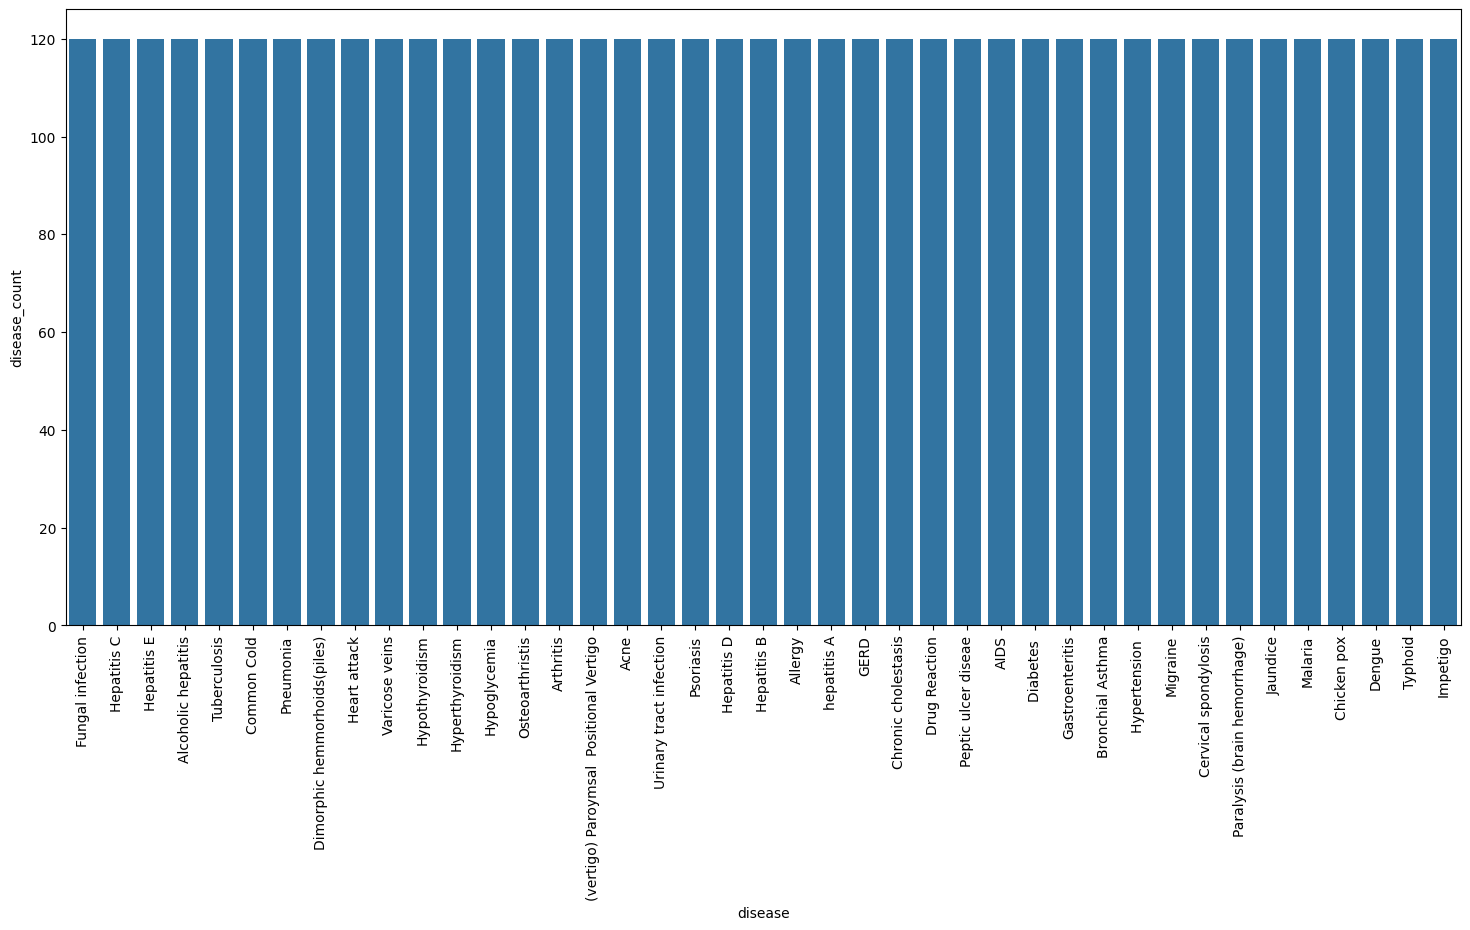

In [52]:
# Exploratory Data Analysis (EDA) . to check if the data distribution is balanced for the  sympthoms/features

# Count occurrences of each disease in the dataset
count_of_diseases = data_df["prognosis"].value_counts()

# Creating a summary DataFrame
summary_data = pd.DataFrame({
    "disease": count_of_diseases.index,
    "disease_count": count_of_diseases.values
})

# Plot a bar chart to visualize disease distribution
plt.figure(figsize=(18, 8))
sns.barplot(x="disease", y="disease_count", data=summary_data)
plt.xticks(rotation=90)
plt.show()

The dataset is observed to be well-balanced with precisely 120 samples for each disease, eliminating the need for further balancing. However, the target column, 'prognosis', is in object datatype, unsuitable for machine learning. To resolve this, a label encoder will be used to convert the 'prognosis' column into a numerical datatype, assigning a unique index to each label in the process.

In [82]:
#correlation
data_df.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.151898
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,-0.146564
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.063307
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.237346
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.202584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720,0.195249
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120,0.091116
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120,0.091116
yellow_crust_ooze,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,0.946120,1.000000,0.091116


<Axes: >

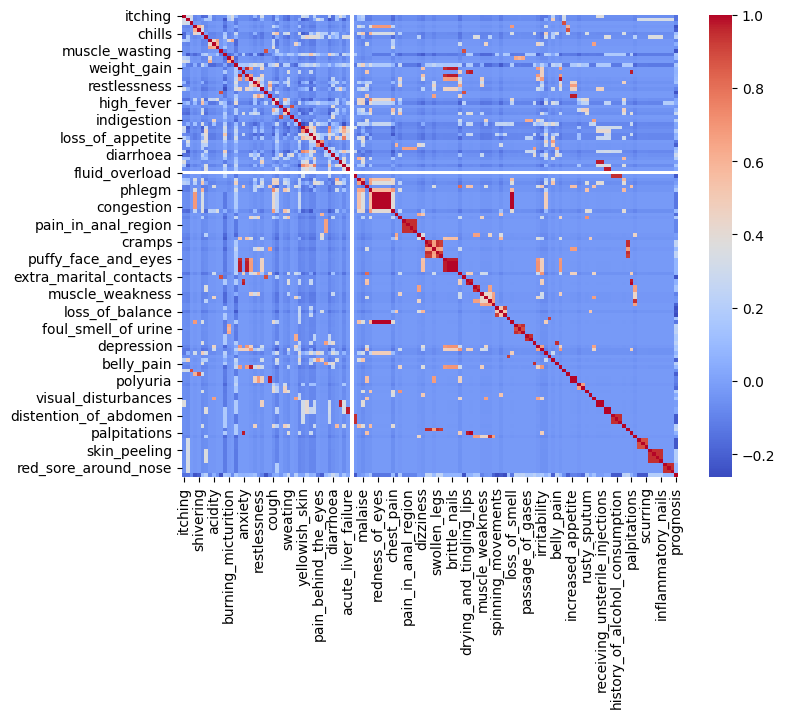

In [ ]:
#  plot heatmap to show correction within the sympthoms for each prognosis
plt.figure(figsize=(8,6))
sns.heatmap(data=data_df.corr(),cmap='coolwarm')


The correlation heatmap and matrix shows valuable insights into the interrelationships among symptoms with some showing strong correlation and relationship , which may draw cocnerns around  multicollinearity and the risk of overfitting. In this specific context, multicollinearity is deliberately overlooked due to the project's primary objective—prediction rather than inference. Predictive modeling prioritizes the accurate prediction of the outcome variable, and in this pursuit, the influence of multicollinearity on predictive performance is deemed minimal.

In [54]:
# Label Encoding for Target Variable (prognosis)

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply label encoding to the "prognosis" column in the DataFrame
data_df["prognosis"] = encoder.fit_transform(data_df["prognosis"])



#The target column is now  encoded  
data_df[["prognosis"]]

,prognosis
0,15
1,15
2,15
3,15
4,15
...,...
4915,0
4916,2
4917,38
4918,35


As seen above, the target column has been encoded, Model encoding is  required here forthe following reasons;
1. Support vector machines and decision trees, require numerical input. Label encoding facilitates the conversion of categorical variables into a numerical format, allowing these algorithms to operate effectively.
2. It reduces dimensionality and improves moddel performance 
3. It is memory efficient, simple and easy to inteprete 


### Splitting into train and Test sets for model training 

Having cleaned the data by eliminating null values and transforming labels into numerical format, the subsequent step involves partitioning the dataset for model training and testing. The data will be divided into an 80:20 ratio, with 80% designated for model training and 20% reserved for assessing model performance.


In [55]:
# Data Splitting for Training and Testing

# Select features (X) and target variable (y)
X = data_df.iloc[:, :-1]
y = data_df.iloc[:, -1]

random_state=24

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Display the dimensions of the training and testing sets
print(f"Training Data Shape: Features - {X_train.shape}, Target - {y_train.shape}")
print(f"Testing Data Shape: Features - {X_test.shape}, Target - {y_test.shape}")


Training Data Shape: Features - (3936, 132), Target - (3936,)
Testing Data Shape: Features - (984, 132), Target - (984,)


## Model Building 

K-Fold cross-validation will be employed to assess the performance of the machine learning models. Specifically, Support Vector Classifier, Gaussian Naive Bayes Classifier, and Random Forest Classifier will undergo cross-validation.


**K-Fold Cross-Validation:**

K-Fold cross-validation involves dividing the dataset into k subsets or folds. The model is trained on k-1 folds and evaluated on the remaining fold, repeating this process k times to ensure each fold serves as a validation set at least once.
K-Fold cross-validation is crucial in disease prediction models as it provides a robust estimate of the model's performance across different subsets of the data, reducing the risk of overfitting and providing more reliable performance metrics.

**Support Vector Classifier (SVC):**

Support Vector Classifier is a discriminative classifier that aims to find an optimal hyperplane in hyperspace to separate labeled training data into distinct categories. It is effective in high-dimensional spaces.
SVC is valuable in disease prediction models as it can handle complex relationships between symptoms, potentially capturing non-linear patterns in the data.

**Gaussian Naive Bayes Classifier:**
Gaussian Naive Bayes is a probabilistic algorithm that utilizes Bayes Theorem for classification. It assumes that features are conditionally independent given the class label and is particularly useful when dealing with continuous data.
Gaussian Naive Bayes is beneficial in disease prediction models, offering a probabilistic approach to classifying symptoms and handling uncertainty in predictions.

**Random Forest Classifier:**
Random Forest is an ensemble learning algorithm that employs multiple decision trees for classification. It aggregates the predictions of individual trees, typically using the mode, to make the fin prediction.
Random Forest is advantageous in disease prediction models due to its ability to handle complex relationships, reduce overfitting, and provide robust predictions by combining outputs from multiple decision trees.

### Cross Validation and Model  Training 

In [56]:
# Function to Define Scoring Metric for k-fold Cross Validation
def cv_scoring(estimator, X, y):
    """
    Custom scoring metric for k-fold cross-validation.
    
    Parameters:
    - estimator: Machine learning model
    - X: Features
    - y: Target variable
    
    Returns:
    - Accuracy score based on the model predictions
    """
    return accuracy_score(y, estimator.predict(X))


# Initializing Prediction Models 
prediction_models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

# Producing Cross Validation Scores for the Models
for model_name, model_instance in prediction_models.items():
    scores = cross_val_score(model_instance, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)
    
    # Display Results
    print("=" * 60)
    print(f"Model: {model_name}")
    print(f"Cross Validation Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")


Model: SVC
Cross Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Model: Gaussian NB
Cross Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Model: Random Forest
Cross Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Based on the aforementioned results, it's evident that all our machine learning algorithms are exhibiting strong performance, as indicated by high mean scores following k-fold cross-validation. To enhance the model's robustness, a combination strategy is proposed – taking the mode of predictions from all three models. This ensemble approach ensures that even if one model produces incorrect predictions while the other two are accurate, the fin output remains correct. Employing this strategy contributes to maintaining highly accurate predictions on entirely new and unseen data. Subsequently, in the following code section, all three models will be trained on the provided training data. The quality of these models will be assessed using a confusion matrix, and their predictions will be combined.

### Training the  Models   using ;
1. SVM Classifier 
2. Gaussian Classifer
3. Random Forest Classifier

Accuracy on Training Data by SVM Classifier: 100.0
Accuracy on Test Data by SVM Classifier: 100.0


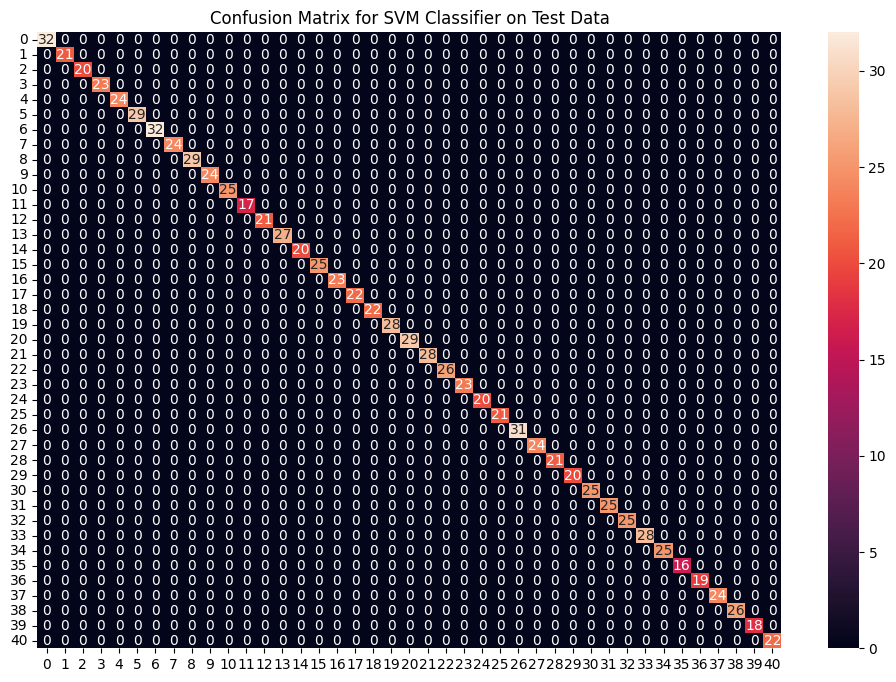

Accuracy on Training Data by Naive Bayes Classifier: 100.0
Accuracy on Test Data by Naive Bayes Classifier: 100.0


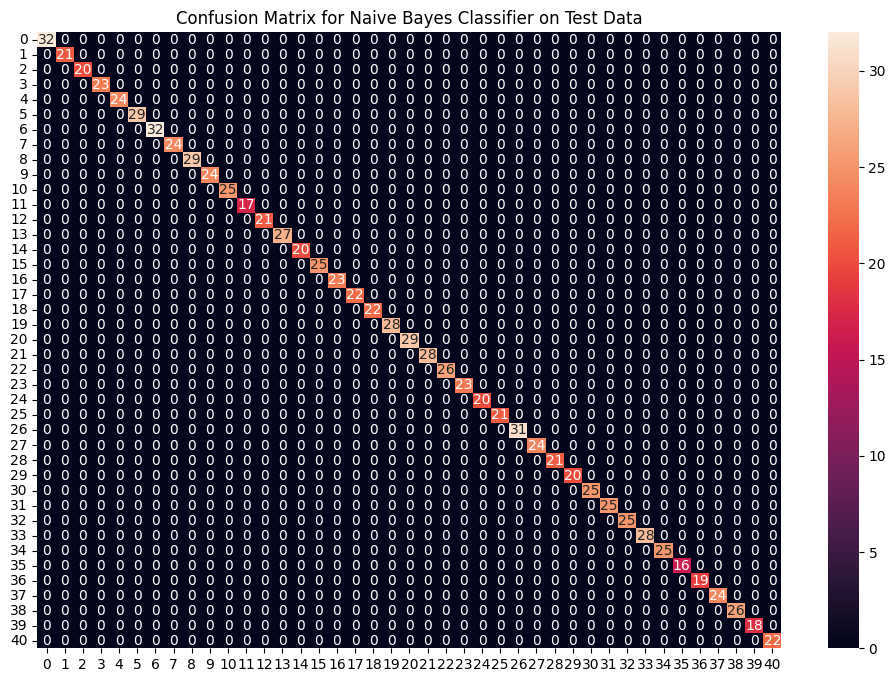

Accuracy on Training Data by Random Forest Classifier: 100.0
Accuracy on Test Data by Random Forest Classifier: 100.0


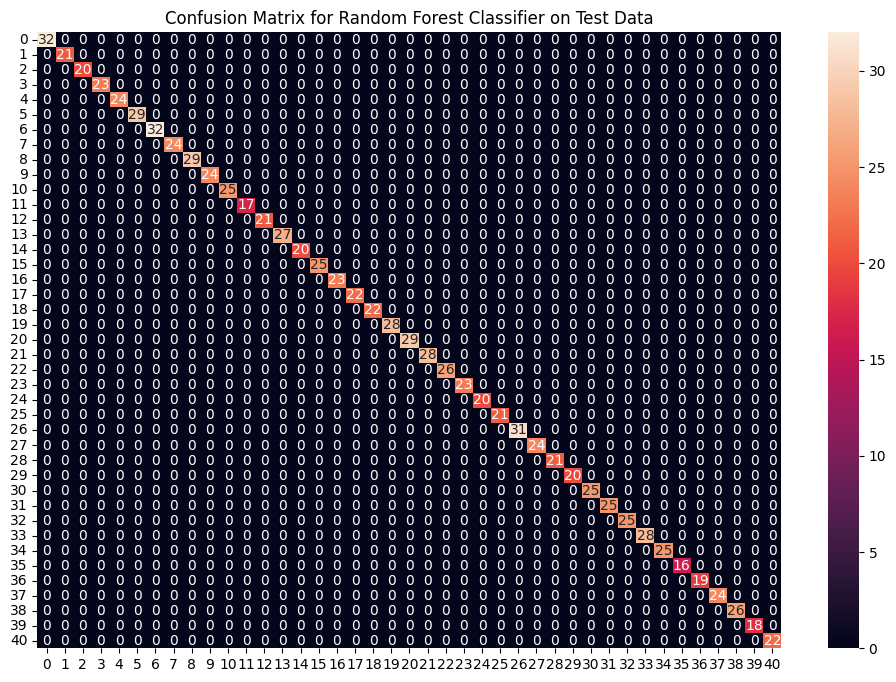

In [57]:
# Training and Testing Support Vector Machine (SVM) Classifier

# Initialize SVM model
svm_classifier = SVC()

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on test data
svm_preds = svm_classifier.predict(X_test)

# Evaluate and display accuracy on the training and test data
print(f"Accuracy on Training Data by SVM Classifier: {accuracy_score(y_train, svm_classifier.predict(X_train)) * 100}")
print(f"Accuracy on Test Data by SVM Classifier: {accuracy_score(y_test, svm_preds) * 100}")

# Generate and visualize confusion matrix for SVM Classifier
svm_cf_matrix = confusion_matrix(y_test, svm_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(svm_cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and Testing Naive Bayes Classifier

# Initialize Naive Bayes model
nb_classifier = GaussianNB()

# Train the Naive Bayes model
nb_classifier.fit(X_train, y_train)

# Make predictions on test data
nb_preds = nb_classifier.predict(X_test)

# Evaluate and display accuracy on the training and test data
print(f"Accuracy on Training Data by Naive Bayes Classifier: {accuracy_score(y_train, nb_classifier.predict(X_train)) * 100}")
print(f"Accuracy on Test Data by Naive Bayes Classifier: {accuracy_score(y_test, nb_preds) * 100}")

# Generate and visualize confusion matrix for Naive Bayes Classifier
nb_cf_matrix = confusion_matrix(y_test, nb_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(nb_cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and Testing Random Forest Classifier

# Initialize Random Forest model
rf_classifier = RandomForestClassifier(random_state=18)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Make predictions on test data
rf_preds = rf_classifier.predict(X_test)

# Evaluate and display accuracy on the training and test data
print(f"Accuracy on Training Data by Random Forest Classifier: {accuracy_score(y_train, rf_classifier.predict(X_train)) * 100}")
print(f"Accuracy on Test Data by Random Forest Classifier: {accuracy_score(y_test, rf_preds) * 100}")

# Generate and visualize confusion matrix for Random Forest Classifier
rf_cf_matrix = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(rf_cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()



### Fitting the Model on entire dataset and testing performance on the validation set

Accuracy on Test dataset by the combined model: 100.0


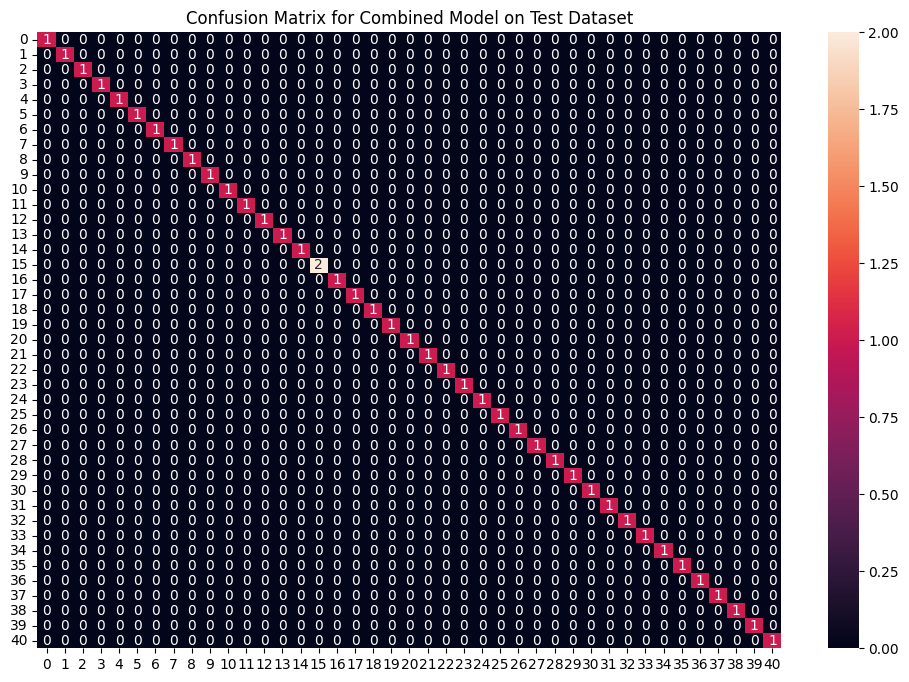

In [81]:

# Initialize models
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

# Train models on the whole data
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Read test data
test_data = pd.read_csv("../datasets/testing.csv").dropna(axis=1)
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Make predictions and take mode of predictions made by all classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Calculate final predictions using Counter
final_preds = [Counter([i, j, k]).most_common(1)[0][0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

# Evaluate and visualize results
accuracy_combined_model = accuracy_score(test_Y, final_preds) * 100
print(f"Accuracy on Test dataset by the combined model: {accuracy_combined_model}")

cf_matrix_combined_model = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_combined_model, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


### Save Model as Pickle for future use in Application

In [88]:

# Save models to files
with open('../models/rf_model.pkl', 'wb') as rf_file:
    pickle.dump(final_rf_model, rf_file)

with open('../models/svm_model.pkl', 'wb') as svm_file:
    pickle.dump(final_svm_model, svm_file)

with open('../models/nb_model.pkl', 'wb') as nb_file:
    pickle.dump(final_nb_model, nb_file)



array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)